<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [41]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score , root_mean_squared_error , mean_squared_error
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [42]:
## Write your code here ##

"""Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]"""

data = pd.read_csv('./Q1/Boston.csv').to_numpy()
input = data[:,:13]
output = data[:,-1].reshape(-1,1)
X , y = minmax_scale(input) , output.copy()
polyFeatures2 = PolynomialFeatures(2,interaction_only=True,include_bias=False)
X = polyFeatures2.fit_transform(X)
m , n = X.shape
print(f'X shape : {X.shape}, Y shape : {y.shape}')

X shape : (506, 91), Y shape : (506, 1)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [43]:
## Write your code here ##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 , random_state = 40)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

print(f'''RMSE of Train Data : {root_mean_squared_error(y_train,y_train_predict):.3f}
RMSE of Test Data : {root_mean_squared_error(y_test,y_test_predict):.3f}
R2 for Train Data : {r2_score(y_train,y_train_predict):.3f}
R2 for Test data : {r2_score(y_test,y_test_predict):.3f}''')

equation = 'y = ' + ' + '.join([f'{coef:.2f}x{i}' for i, coef in enumerate(reg.coef_[0])]) + f' + {reg.intercept_[0]:.2f}'
print(equation)

RMSE of Train Data : 2.463
RMSE of Test Data : 3.887
R2 for Train Data : 0.921
R2 for Test data : 0.867
y = -382.42x0 + 2.13x1 + -25.66x2 + 2.55x3 + -6.37x4 + 82.11x5 + 69.88x6 + 15.61x7 + 33.80x8 + 17.30x9 + -6.69x10 + 37.51x11 + 31.78x12 + 3416.50x13 + -639.60x14 + 423.83x15 + -82.77x16 + 100.54x17 + -48.79x18 + -142.44x19 + -2053.92x20 + 2921.52x21 + 212.50x22 + -13.68x23 + 101.17x24 + -0.40x25 + -11.41x26 + 22.17x27 + -0.89x28 + -3.24x29 + 17.77x30 + -14.53x31 + 14.39x32 + -5.71x33 + -4.06x34 + -49.68x35 + -0.51x36 + 41.01x37 + 44.10x38 + -6.06x39 + -9.96x40 + -15.65x41 + 9.80x42 + -9.29x43 + 2.93x44 + 11.72x45 + -10.49x46 + -29.01x47 + 3.81x48 + 42.84x49 + -15.93x50 + 7.30x51 + -6.38x52 + 12.94x53 + -18.24x54 + 1.13x55 + -29.89x56 + 19.21x57 + 0.14x58 + 1.96x59 + -11.34x60 + 4.13x61 + 7.84x62 + -38.00x63 + -4.20x64 + -14.56x65 + -44.80x66 + -14.75x67 + 3.92x68 + -54.53x69 + -14.35x70 + 30.38x71 + -19.55x72 + -3.27x73 + -39.64x74 + -17.02x75 + -20.64x76 + -13.72x77 + 2.20x78 + -27.

**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10 ** np.linspace (3,-3,100) *0.5$$

for alpha = 0.0049 min MSE  = 12.0160
for alpha = 0.0049 max R2  = 0.8941


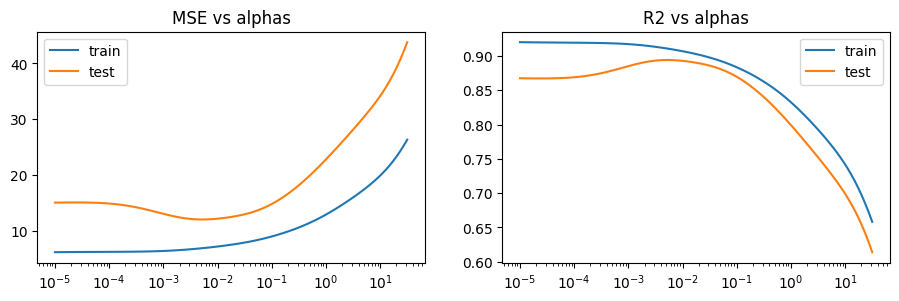

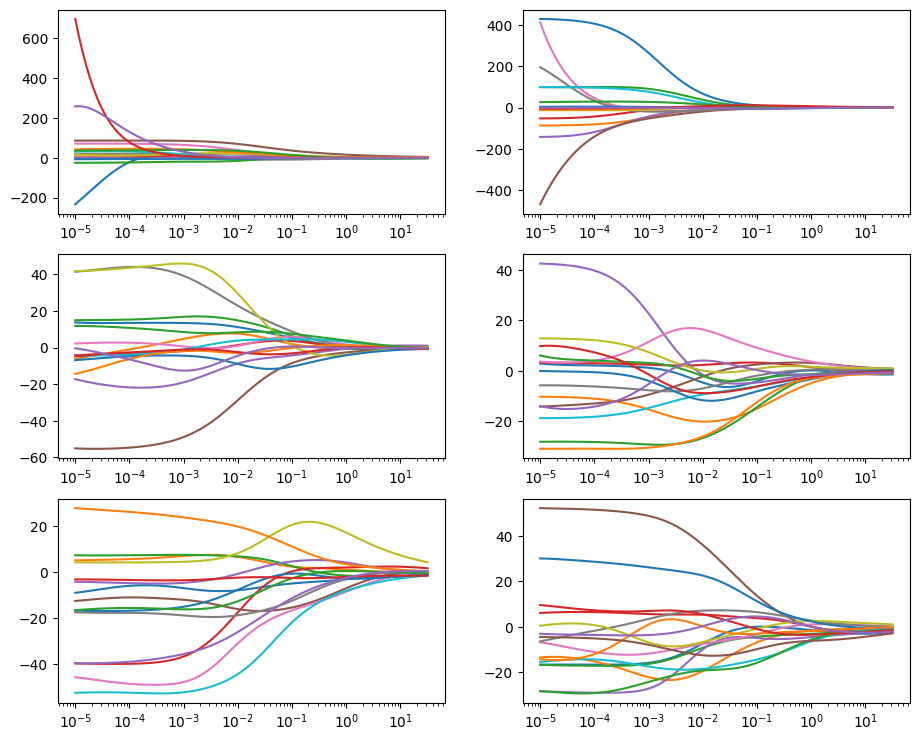

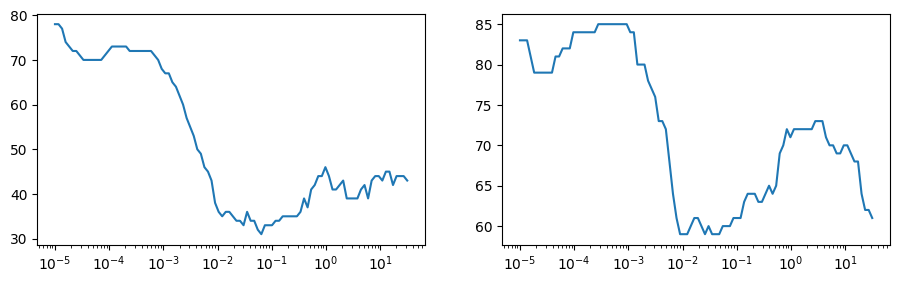

In [44]:
## Write your code here ##
num = 100
alphas = 10 ** (np.linspace(-10,3,num) * 0.5)
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,num))
for indx,alpha in enumerate(alphas):
    reg = Ridge(alpha)
    reg.fit(X_train,y_train)
    y_train_predict  = reg.predict(X_train)
    y_test_predict = reg.predict(X_test)
    RMSE_train , R2_train = root_mean_squared_error(y_train,y_train_predict) , r2_score(y_train,y_train_predict)
    RMSE_test , R2_test = root_mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.coef_.squeeze()

def plot_semilog(X,Y1,Y2,title,i):
    plt.subplot(1,2,i)
    plt.title(f'{title} vs alphas')
    plt.semilogx(X,Y1,label = 'train')
    plt.semilogx(X,Y2,label = 'test')
    if i == 1 : print(f'for alpha = {X[np.argmin(Y2)]:.4f} min MSE  = {np.min(Y2):.4f}')
    else : print(f'for alpha = {X[np.argmax(Y2)]:.4f} max R2  = {np.max(Y2):.4f}')
    plt.legend()

plt.figure(figsize=(11,3))
plot_semilog(alphas,RMSE_history_train**2,RMSE_history_test**2,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,9))
for i in range(6):
    plt.subplot(3,2,i + 1)
    for j in range(15):
        plt.semilogx(alphas,coef_history[15*i+j,:],label = f'coef{15*i+j}')
plt.semilogx(alphas,coef_history[90,:],label = f'coef{12}')

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.1 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.subplot(1,2,2)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.2 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

In [45]:
reg = Ridge(alpha=0.0049)
reg.fit(X_train,y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

print(f'''RMSE of Train Data : {root_mean_squared_error(y_train,y_train_predict):.3f}
RMSE of Test Data : {root_mean_squared_error(y_test,y_test_predict):.3f}
R2 for Train Data : {r2_score(y_train,y_train_predict):.3f}
R2 for Test data : {r2_score(y_test,y_test_predict):.3f}''')

equation = 'y = ' + ' + '.join([f'{coef:.2f}x{i}' for i, coef in enumerate(reg.coef_[0])]) + f' + {reg.intercept_[0]:.2f}'
print(equation)

RMSE of Train Data : 2.616
RMSE of Test Data : 3.466
R2 for Train Data : 0.911
R2 for Test data : 0.894
y = -1.17x0 + 2.47x1 + -18.60x2 + 20.86x3 + 4.00x4 + 76.30x5 + 48.58x6 + 5.47x7 + 22.16x8 + 6.95x9 + -5.88x10 + 32.32x11 + 37.37x12 + 1.95x13 + 5.91x14 + 112.16x15 + -16.26x16 + 56.23x17 + -0.87x18 + -16.83x19 + -28.03x20 + -13.59x21 + -16.63x22 + -1.37x23 + 39.66x24 + 0.08x25 + 0.92x26 + 20.09x27 + 3.64x28 + -1.93x29 + 12.41x30 + 7.65x31 + 16.30x32 + 0.03x33 + -11.77x34 + -36.67x35 + -0.13x36 + 28.35x37 + 38.27x38 + 2.68x39 + -6.74x40 + -2.45x41 + 7.96x42 + -1.50x43 + -7.86x44 + -2.16x45 + -19.39x46 + -28.32x47 + 2.16x48 + 3.82x49 + -4.59x50 + 16.90x51 + -7.83x52 + 1.82x53 + -10.74x54 + -9.89x55 + -28.07x56 + 0.28x57 + -8.00x58 + 3.10x59 + -8.21x60 + 7.32x61 + 7.16x62 + -25.34x63 + -2.47x64 + -14.54x65 + -37.85x66 + -19.37x67 + 6.12x68 + -48.04x69 + -10.64x70 + 21.32x71 + -14.74x72 + -2.79x73 + -29.88x74 + -11.04x75 + -22.31x76 + -11.88x77 + 5.43x78 + -16.13x79 + 41.63x80 + -8.86x81

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

for alpha = 0.0020 min MSE  = 12.7937
for alpha = 0.0020 max R2  = 0.8872


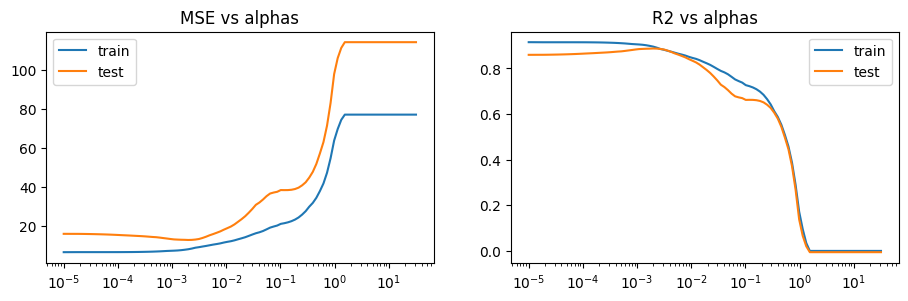

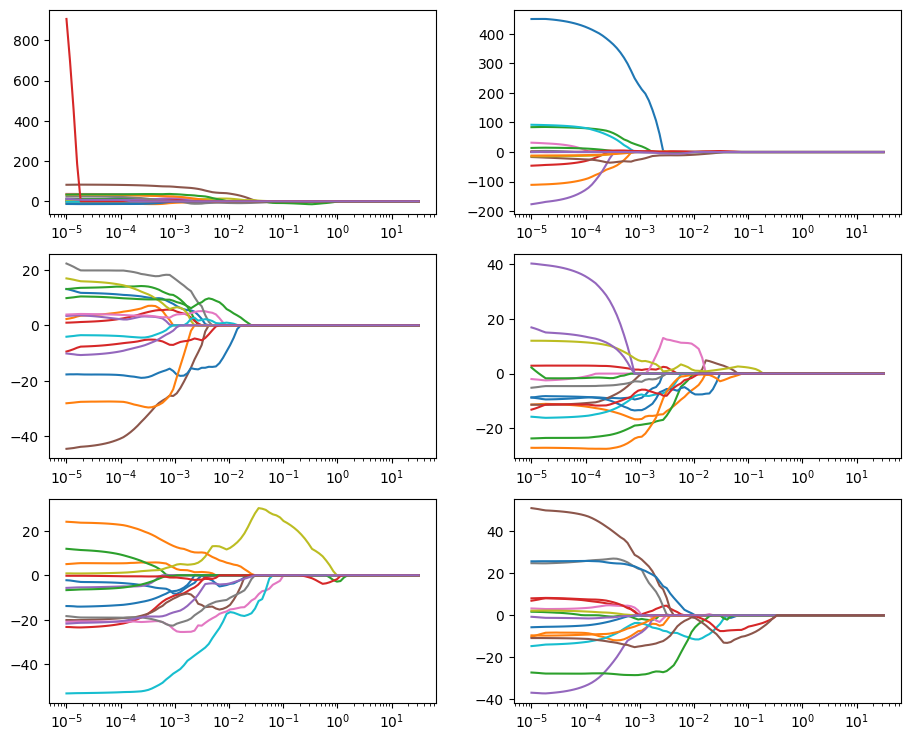

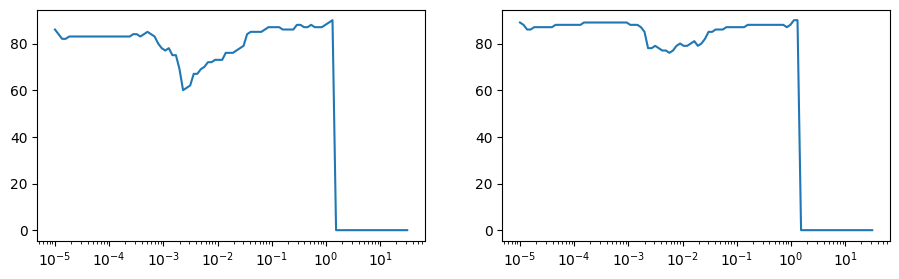

In [46]:
## Write your code here ##
## Write your code here ##
num = 100
alphas = 10 ** (np.linspace(-10,3,num) * 0.5)
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,num))
for indx,alpha in enumerate(alphas):
    reg = Lasso(alpha)
    reg.fit(X_train,y_train)
    y_train_predict  = reg.predict(X_train)
    y_test_predict = reg.predict(X_test)
    RMSE_train , R2_train = root_mean_squared_error(y_train,y_train_predict) , r2_score(y_train,y_train_predict)
    RMSE_test , R2_test = root_mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.coef_.squeeze()

def plot_semilog(X,Y1,Y2,title,i):
    plt.subplot(1,2,i)
    plt.title(f'{title} vs alphas')
    plt.semilogx(X,Y1,label = 'train')
    plt.semilogx(X,Y2,label = 'test')
    if i == 1 : print(f'for alpha = {X[np.argmin(Y2)]:.4f} min MSE  = {np.min(Y2):.4f}')
    else : print(f'for alpha = {X[np.argmax(Y2)]:.4f} max R2  = {np.max(Y2):.4f}')
    plt.legend()

plt.figure(figsize=(11,3))
plot_semilog(alphas,RMSE_history_train**2,RMSE_history_test**2,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,9))
for i in range(6):
    plt.subplot(3,2,i + 1)
    for j in range(15):
        plt.semilogx(alphas,coef_history[15*i+j,:],label = f'coef{15*i+j}')
plt.semilogx(alphas,coef_history[90,:],label = f'coef{12}')

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.1 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.subplot(1,2,2)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.2 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

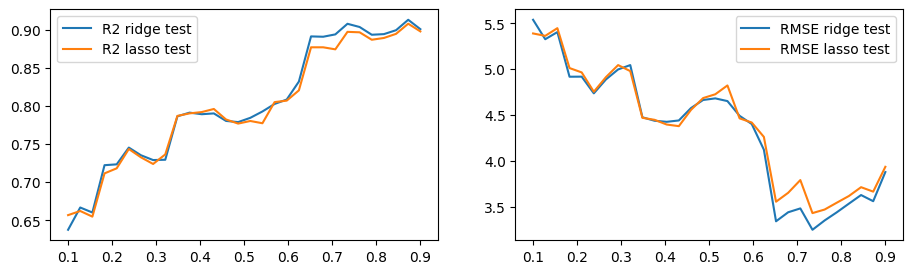

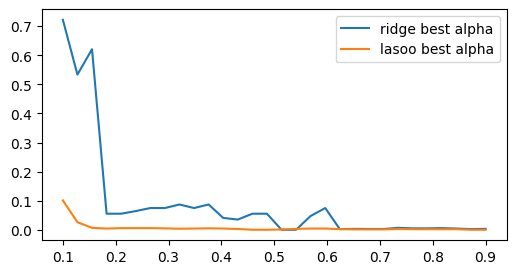

In [53]:
## Write you code here ##
num_ratio = 30
ratios = np.linspace(0.1,0.9,num_ratio)
R2_reg , MSE_reg = np.zeros(num_ratio) , np.zeros(num_ratio)
R2_ridge , MSE_ridge = np.zeros(num_ratio) , np.zeros(num_ratio)
R2_lasso , MSE_lasso = np.zeros(num_ratio) , np.zeros(num_ratio)
ridge_best_alpha , lasso_best_alpha = np.zeros(num_ratio) , np.zeros(num_ratio)
for indx,ratio in enumerate(ratios):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio , random_state = 40)

    reg = LinearRegression()
    reg.fit(X_train,y_train)
    y_test_predict = reg.predict(X_test)
    MSE_reg[indx] , R2_reg[indx] =  root_mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)
    
    t_R2_ridge , t_MSE_ridge = np.zeros(num) , np.zeros(num)
    t_R2_lasso , t_MSE_lasso = np.zeros(num) , np.zeros(num)
    for j,alpha in enumerate(alphas):
        ridge = Ridge(alpha)
        ridge.fit(X_train,y_train)
        y_test_predict_ridge = ridge.predict(X_test)
        t_MSE_ridge[j] , t_R2_ridge[j] =  root_mean_squared_error(y_test,y_test_predict_ridge) , r2_score(y_test,y_test_predict_ridge)
        
        lasso = Lasso(alpha)
        lasso.fit(X_train,y_train)
        y_test_predict_lasso = lasso.predict(X_test)
        t_MSE_lasso[j] , t_R2_lasso[j] =  root_mean_squared_error(y_test,y_test_predict_lasso) , r2_score(y_test,y_test_predict_lasso)
    
    ridge_best_alpha[indx] = alphas[np.argmin(t_MSE_ridge)]
    MSE_ridge[indx] , R2_ridge[indx] =  np.min(t_MSE_ridge) , np.max(t_R2_ridge)
    lasso_best_alpha[indx] = alphas[np.argmin(t_MSE_lasso)]
    MSE_lasso[indx] , R2_lasso[indx] =  np.min(t_MSE_lasso) , np.max(t_R2_lasso)

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
#plt.plot(ratios,R2_reg,label = 'R2 regression test')
plt.plot(ratios,R2_ridge,label = 'R2 ridge test')
plt.plot(ratios,R2_lasso,label = 'R2 lasso test')
plt.legend()
plt.subplot(1,2,2)
#plt.plot(ratios,MSE_reg,label = 'RMSE regression test')
plt.plot(ratios,MSE_ridge,label = 'RMSE ridge test')
plt.plot(ratios,MSE_lasso,label = 'RMSE lasso test')
plt.legend()

plt.figure(figsize=(6,3))
plt.plot(ratios,ridge_best_alpha,label = 'ridge best alpha')
plt.plot(ratios,lasso_best_alpha,label = 'lasoo best alpha')
plt.legend()
plt.show()